<a href="https://colab.research.google.com/github/pvanand07/Zomato_Restaurent_Clustering_Unsupervised_ML/blob/master/Zomato_Restaurent_Clustering_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Zomato Restaurent Clustering**



##### **Project Type**    - Classification
##### **Contribution**    - Individual


References \
Text Analysis
- https://investigate.ai/reference/text-analysis/

Topic Modeling \
- https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/
- https://nkoenig06.github.io/gd-tm-lda.html
- https://investigate.ai/text-analysis/introduction-to-topic-modeling/

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**




# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams


import numpy as np
import seaborn as sns
from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz



import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [4]:
restaurant_data = pd.read_csv("/content/drive/MyDrive/Almabetter/Almabetter Projects/Zomato-restaurant-classification/Zomato Restaurant names and Metadata.csv")
reviews = pd.read_csv("/content/drive/MyDrive/Almabetter/Almabetter Projects/Zomato-restaurant-classification/Zomato Restaurant reviews.csv")
print("restaurant_data shape:",restaurant_data.shape)
print("reviews shape:",reviews.shape)

restaurant_data shape: (105, 6)
reviews shape: (10000, 7)


### Dataset First View

In [5]:
restaurant_data.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [6]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Information

In [7]:
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [9]:
# Check for duplicates
print("Duplicates in restaurant_data:",restaurant_data.duplicated().sum())
print("Duplicates in reviews:",reviews.duplicated().sum())

Duplicates in restaurant_data: 0
Duplicates in reviews: 36


#### Missing Values/Null Values

In [10]:
# Check for missing values
print("Missing values in restaurant_data:")
print(restaurant_data.isnull().sum(),"\n")
print("Missing values in reviews:")
print(reviews.isnull().sum())

Missing values in restaurant_data:
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64 

Missing values in reviews:
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


<Axes: >

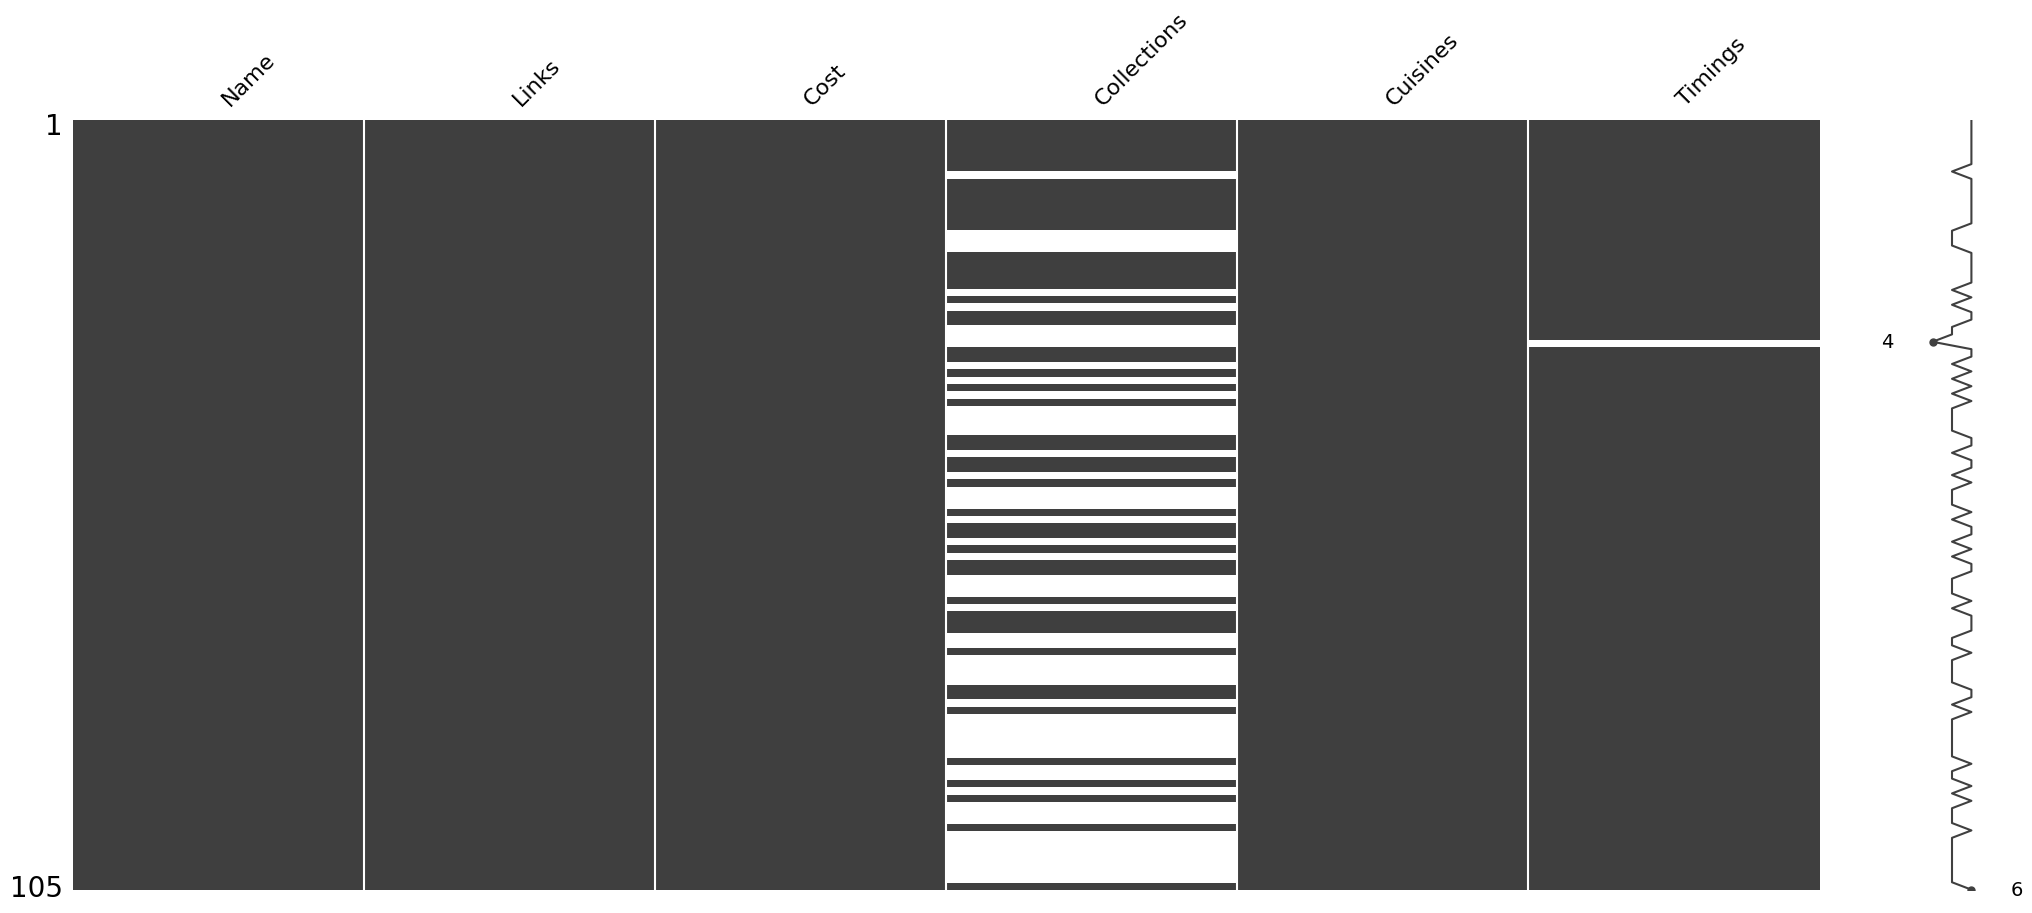

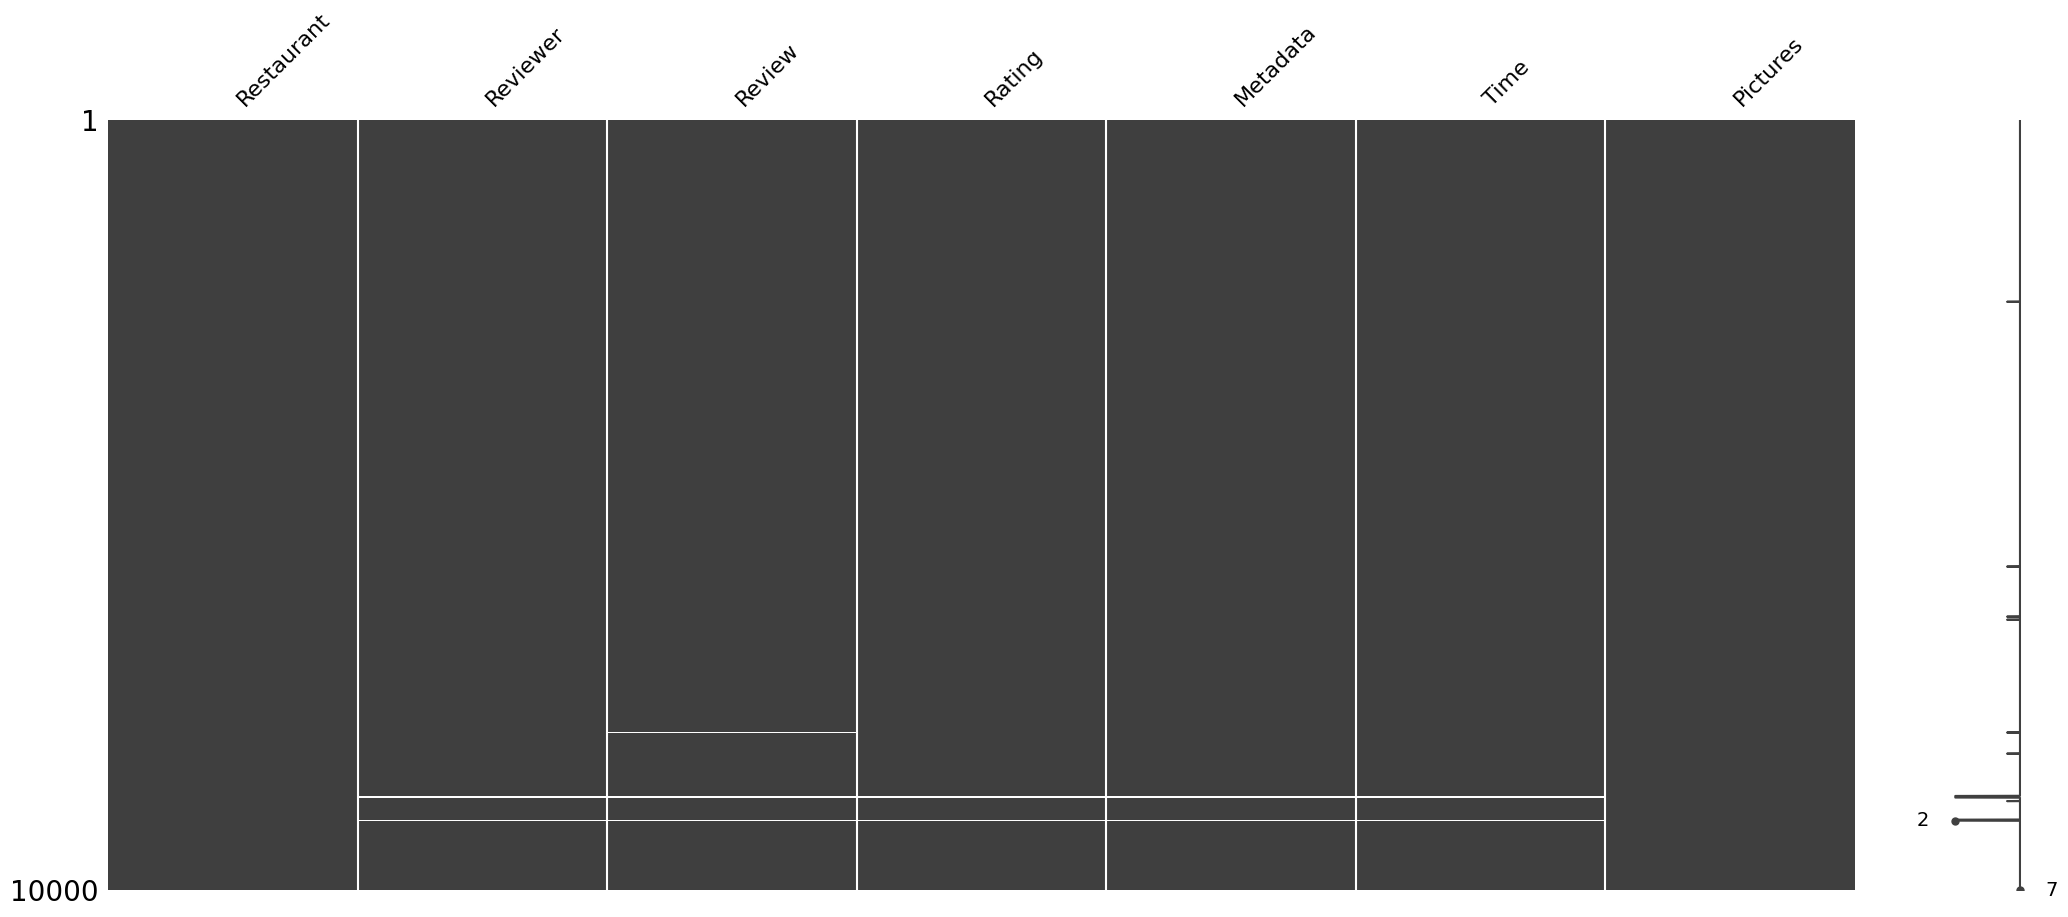

In [11]:
# Visualizing the missing values using missingno
import missingno
missingno.matrix(restaurant_data)
missingno.matrix(reviews)

### What did you know about your dataset?

**Restaurants data**
- The restaurants data consists of information about **105** restaurants with 6 features.
- In the column `"Collections"` **52%** of values are missing

**Reviews data**
- The reviews data cosists of information about **10000** reviews about the **105** restaurants with 7 features.
- In the columns `"Reviewer","Review","Rating","Metadata","Time"` **<0.5%** of the data is missing
---
- Datatypes of all the columns in each dataset is string object

## We'll cluster restaurents based on cost and cuisine

In [12]:
restaurant_data.Cuisines

0      Chinese, Continental, Kebab, European, South I...
1                         Biryani, North Indian, Chinese
2           Asian, Mediterranean, North Indian, Desserts
3      Biryani, North Indian, Chinese, Seafood, Bever...
4      Asian, Continental, North Indian, Chinese, Med...
                             ...                        
100                                     Fast Food, Salad
101                                       Bakery, Mithai
102                       North Indian, Biryani, Chinese
103                                            Fast Food
104                      Thai, Asian, Chinese, Malaysian
Name: Cuisines, Length: 105, dtype: object

In [13]:
restaurant_data.Cuisines_list = restaurant_data.Cuisines.apply(lambda x: x.lower().replace(" ","").split(","))
restaurant_data.Cuisines_list

cusines_set = set()
for cuisines in restaurant_data.Cuisines_list:
  cusines_set.update(cuisines)
cusines_set

{'american',
 'andhra',
 'arabian',
 'asian',
 'bakery',
 'bbq',
 'beverages',
 'biryani',
 'burger',
 'cafe',
 'chinese',
 'continental',
 'desserts',
 'european',
 'fastfood',
 'fingerfood',
 'goan',
 'healthyfood',
 'hyderabadi',
 'icecream',
 'indonesian',
 'italian',
 'japanese',
 'juices',
 'kebab',
 'lebanese',
 'malaysian',
 'mediterranean',
 'mexican',
 'mithai',
 'modernindian',
 'momos',
 'mughlai',
 'northeastern',
 'northindian',
 'pizza',
 'salad',
 'seafood',
 'southindian',
 'spanish',
 'streetfood',
 'sushi',
 'thai',
 'wraps'}

In [14]:
restaurant_data.Cuisines_list

0      [chinese, continental, kebab, european, southi...
1                        [biryani, northindian, chinese]
2          [asian, mediterranean, northindian, desserts]
3      [biryani, northindian, chinese, seafood, bever...
4      [asian, continental, northindian, chinese, med...
                             ...                        
100                                    [fastfood, salad]
101                                     [bakery, mithai]
102                      [northindian, biryani, chinese]
103                                           [fastfood]
104                    [thai, asian, chinese, malaysian]
Name: Cuisines, Length: 105, dtype: object

In [15]:
cost_transformed = restaurant_data.Cost.apply(lambda x: x.replace(",","")).astype(int)
cost_transformed

0       800
1       800
2      1300
3       800
4      1200
       ... 
100     600
101     200
102     500
103     250
104    1700
Name: Cost, Length: 105, dtype: int64

In [16]:
restaurant_data

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


In [17]:
#replace 'Like' with median
reviews['Rating'][reviews['Rating']=='Like'] = np.nan
reviews['Rating'].fillna(reviews['Rating'].median(),inplace=True)
reviews['Rating'] = reviews['Rating'].astype(float)

mean_rating = reviews.groupby('Restaurant')['Rating'].mean().reset_index()

restaurant_data_ratings = restaurant_data.merge(mean_rating, left_on='Name', right_on='Restaurant', how='left')

In [18]:
restaurant_data_ratings['Rating'].fillna(restaurant_data_ratings['Rating'].mean(),inplace=True)

In [19]:
restaurant_data_ratings

,Name,Links,Cost,Collections,Cuisines,Timings,Restaurant,Rating
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,4.2800
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,Paradise,4.7000
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",Flechazo,4.6600
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,Shah Ghouse Hotel & Restaurant,3.2100
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",Over The Moon Brew Company,4.3400
...,...,...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM,NaN,3.6026
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...",NaN,3.6026
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM,NaN,3.6026
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun),NaN,3.6026


In [20]:
from sklearn.preprocessing import MultiLabelBinarizer

# Create a MultiLabelBinarizer
mlb = MultiLabelBinarizer()
features = mlb.fit_transform(restaurant_data.Cuisines_list)

# Create a DataFrame with the cuisine labels
features_df = pd.DataFrame(features, columns=mlb.classes_)

# Check for NaN values in features_df
nan_columns = features_df.columns[features_df.isna().any()].tolist()
nan_values = features_df[nan_columns].isna().sum()
print("NaN values in features_df:")
print(nan_values)

# Convert 'Cost' column to integers
features_df['Cost'] = restaurant_data['Cost'].apply(lambda x: x.replace(",", "")).astype(int)

features_df['avg_rating'] = restaurant_data_ratings['Rating']
features_df


NaN values in features_df:
Series([], dtype: float64)


,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,burger,cafe,...,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Cost,avg_rating
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,800,4.2800
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,800,4.7000
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1300,4.6600
3,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,800,3.2100
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1200,4.3400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,600,3.6026
101,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,200,3.6026
102,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,500,3.6026
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,250,3.6026


In [21]:
reviews

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [22]:
features_df.shape

(105, 46)

In [23]:
cost_transformed.shape

(105,)

In [24]:
features_df.Cost.fillna(features_df.Cost.mean(),inplace=True)

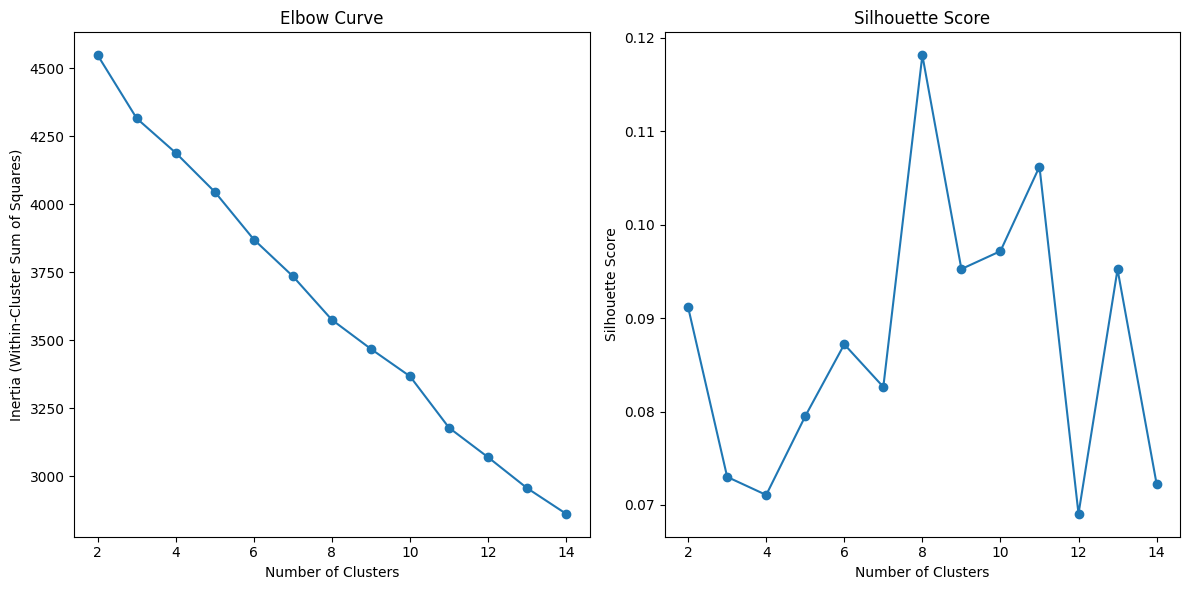

Optimal number of clusters: 8


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#X = features_df
X= StandardScaler().fit_transform(features_df)

# Define a range of cluster numbers to try
cluster_range = range(2, 15)  # You can adjust this range as needed

# Initialize lists to store the inertia (within-cluster sum of squares) and silhouette scores
inertia_values = []
silhouette_scores = []

# Perform K-means clustering for each cluster number in the range
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters,init='k-means++', random_state=42)
    kmeans.fit(X)

    # Calculate the inertia and silhouette score for this cluster number
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the elbow curve to find the optimal number of clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')

# Plot the silhouette score to evaluate cluster quality
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Based on the plots, you can choose the optimal number of clusters
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_clusters}")

# Now, you can re-run K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X)

# Access the cluster labels for your data points
cluster_labels = kmeans.labels_


In [26]:
X.shape

(105, 46)

In [27]:
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans(n_clusters=n_clusters)
      preds = km.fit_predict(X)
      centers = km.cluster_centers_

      score = silhouette_score(X, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data


For n_clusters = 2, silhouette score is 0.09115803707752491


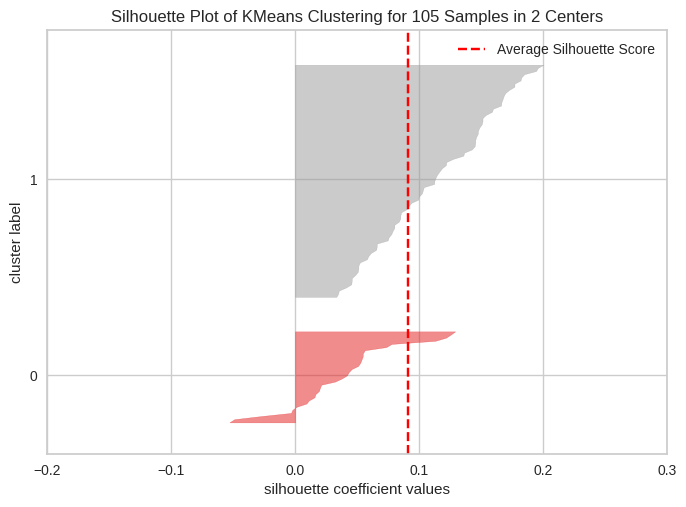

For n_clusters = 3, silhouette score is 0.0745637404349848


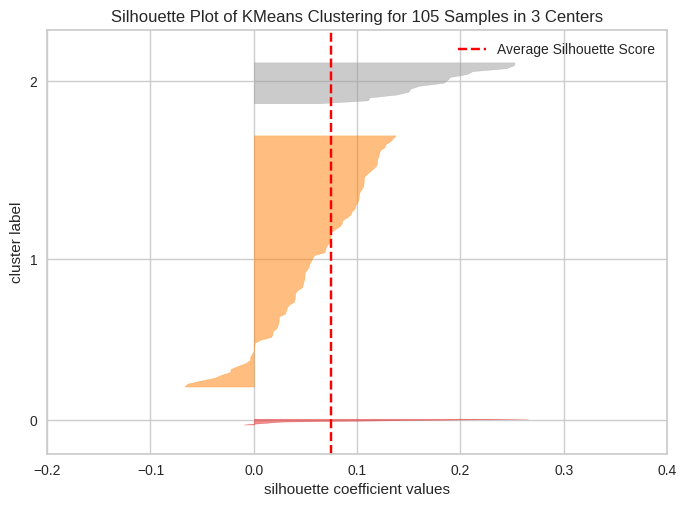

For n_clusters = 4, silhouette score is 0.06170137927006581


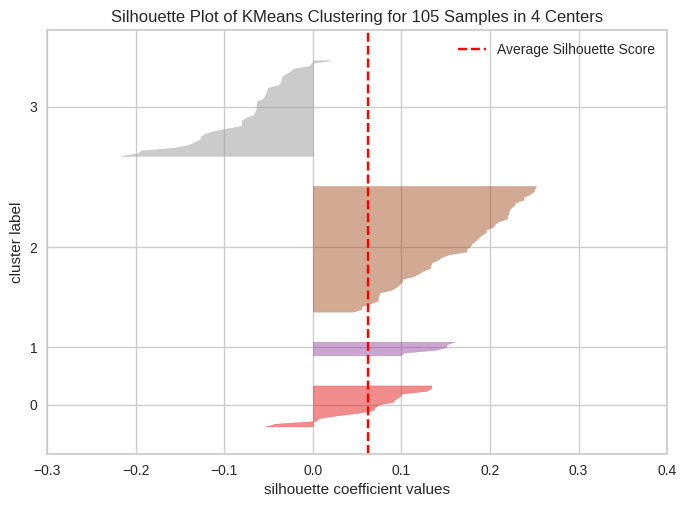

For n_clusters = 5, silhouette score is 0.07640098815082924


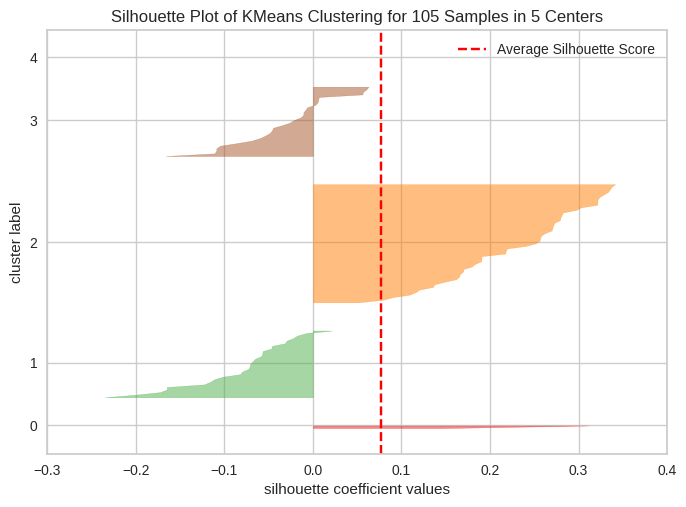

For n_clusters = 6, silhouette score is 0.05220305060824391


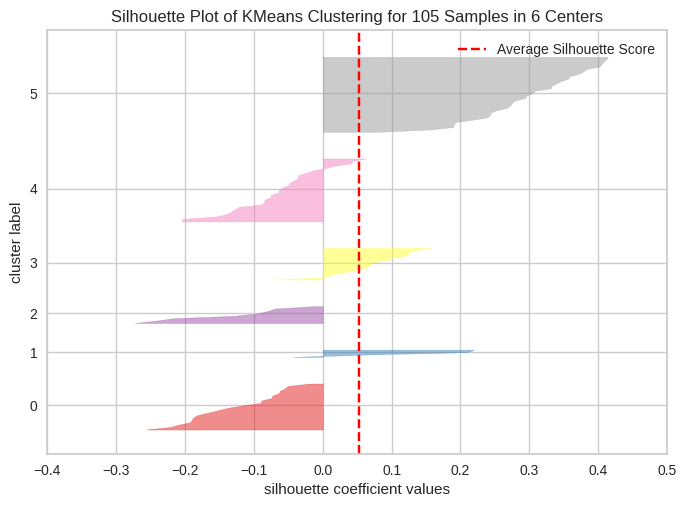

For n_clusters = 7, silhouette score is 0.11471703510311514


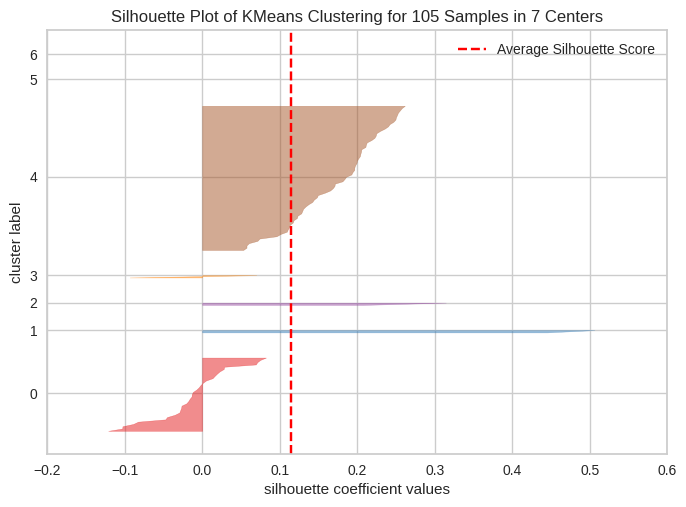

For n_clusters = 8, silhouette score is 0.0803496771819539


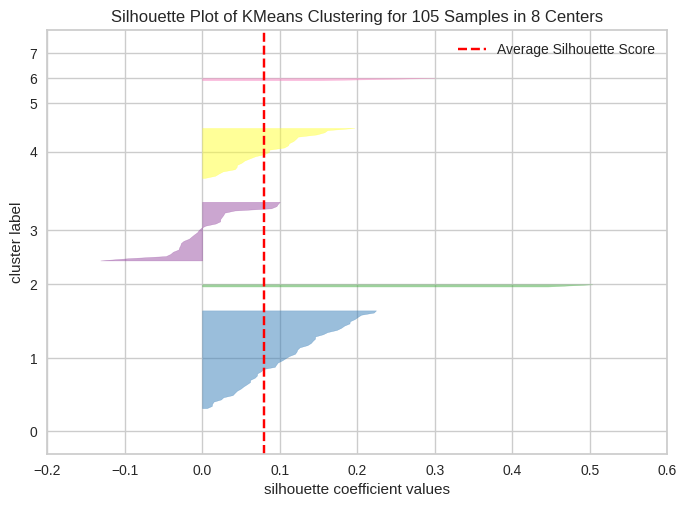

For n_clusters = 9, silhouette score is 0.08555793863746416


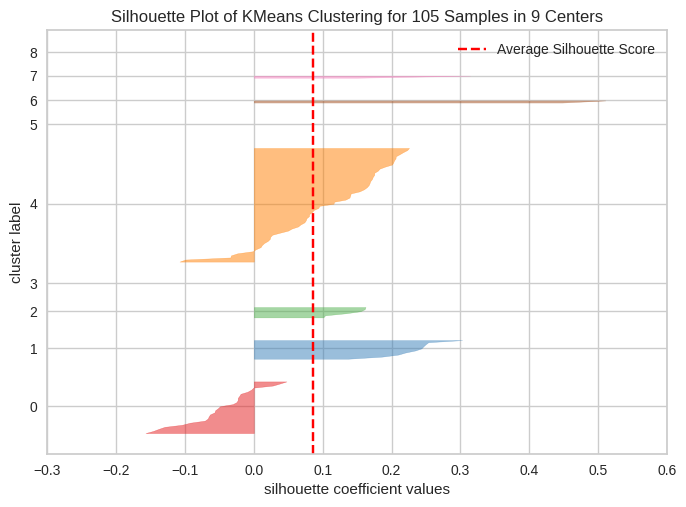

In [28]:
silhouette_score_analysis(10)

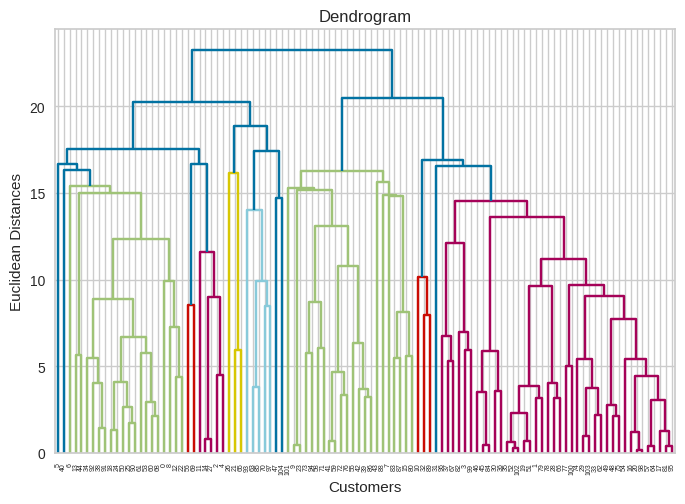

In [29]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=1000, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

## No.of cluster = 6

In [ ]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage = 'ward')
features_df['Cluster'] = hc.fit_predict(X)

In [ ]:
features_df

,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,burger,cafe,...,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Cost,avg_rating,Cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,800.0,4.280000,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,800.0,4.700000,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1300.0,4.660000,0
3,0,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,800.0,3.210000,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1200.0,4.340000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1000.0,3.604777,1
100,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,600.0,3.604777,3
101,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,200.0,3.604777,1
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,500.0,3.604777,1


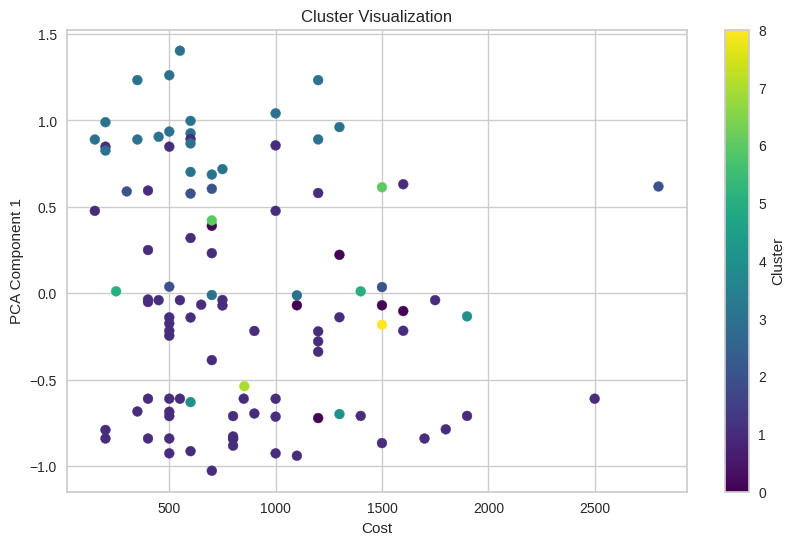

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the data
data = features_df

# Extract the "Cost" and "Cluster" columns
X = data.iloc[:, :-3]  # Features (exclude "Cost" and "Cluster" columns)
y = data["Cluster"]    # Cluster labels
z = data["avg_rating"]       # Cost values
# Reduce dimensionality to 1D using PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(data["Cost"], X_pca[:, 0], c=y, cmap='viridis', marker='o', s=50)
plt.title("Cluster Visualization")
plt.xlabel("Cost")
plt.ylabel("PCA Component 1")
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objs as go
from sklearn.decomposition import PCA
import plotly.express as px

# Load the data
data = features_df

# Extract the "Cost" and "Cluster" columns
X = data.iloc[:, :-3]  # Features (exclude "Cost" and "Cluster" columns)

# Reduce dimensionality to 1D using PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Create a custom colormap for clusters
cluster_colors = px.colors.qualitative.Set1  # You can choose any other color scheme

# Map cluster labels to colors
cluster_to_color = {cluster: color for cluster, color in zip(data["Cluster"].unique(), cluster_colors)}

# Assign colors to each data point based on the cluster
marker_colors = [cluster_to_color[cluster] for cluster in data["Cluster"]]

# Create an interactive 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=X_pca[:, 0],
    y=data["Cost"],
    z=data["avg_rating"],
    mode='markers',
    marker=dict(size=5, color=marker_colors, opacity=0.7)
)])

fig.update_layout(scene=dict(xaxis_title="PCA Component 1", yaxis_title="Cost", zaxis_title="Average Rating"))
fig.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
X= MinMaxScaler().fit_transform(features_df.iloc[:,:-1])

from sklearn.decomposition import NMF

model = NMF(n_components=5)
model.fit(X)

NMF(n_components=5)

In [ ]:

from sklearn.decomposition import LatentDirichletAllocation

# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(X)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [10, 15, 20, 25, 30]})

In [ ]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(X))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 10}
Best Log Likelihood Score:  -492.31479811009086
Model Perplexity:  54.252159824349086


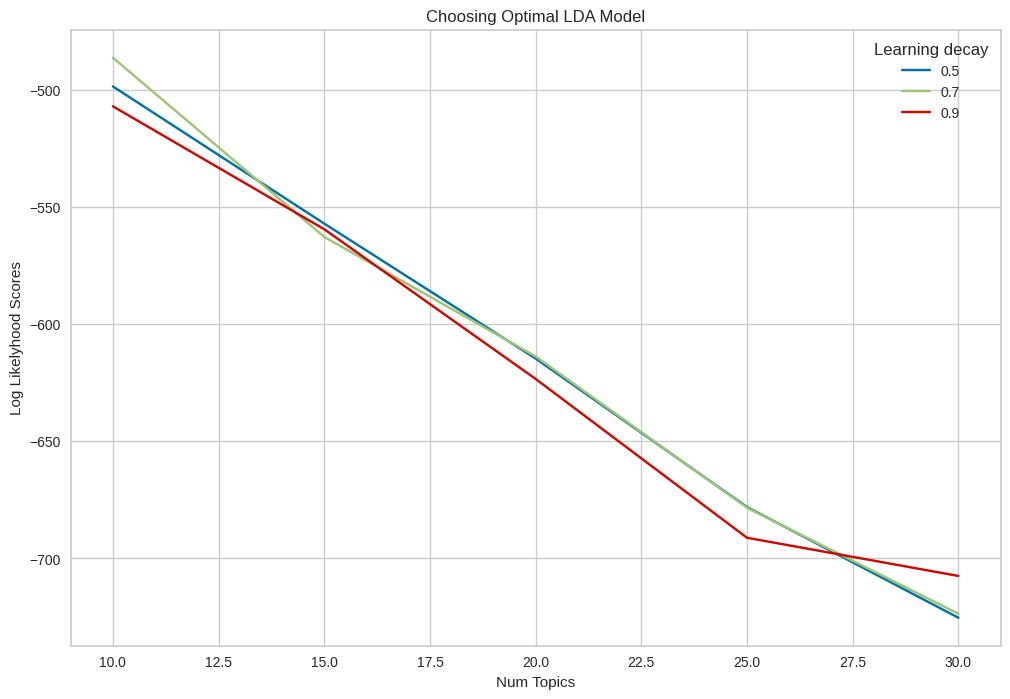

In [ ]:
# Get the mean test scores from the cross-validation results
results = model.cv_results_

# Get Log Likelyhoods from Grid Search Output
n_topics = [10, 15, 20, 25, 30]
log_likelyhoods_5 = np.array(results['mean_test_score'][results['param_learning_decay'] == 0.5])
log_likelyhoods_7 = np.array(results['mean_test_score'][results['param_learning_decay'] == 0.7])
log_likelyhoods_9 = np.array(results['mean_test_score'][results['param_learning_decay'] == 0.9])

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [ ]:
%pip install pyldavis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
%pip install gensim
%pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
features_df.iloc[:,:-1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,burger,cafe,...,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Cost,avg_rating
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,800.0,4.280000
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,800.0,4.700000
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1300.0,4.660000
3,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,800.0,3.210000
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1200.0,4.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1000.0,3.604777
100,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,600.0,3.604777
101,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,200.0,3.604777
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,500.0,3.604777


In [ ]:
import re
data = [
    "The latest advancements in artificial intelligence are reshaping industries and improving our lives.",
    "Climate change is a pressing global issue that requires urgent action and international cooperation.",
    "In the world of sports, athletes are pushing the boundaries of human performance, setting new records and inspiring millions.",
    "Exploring outer space has always fascinated humans, and space exploration continues to unlock the mysteries of the universe.",
    "Advancements in renewable energy technologies are crucial for a sustainable future and reducing our dependence on fossil fuels.",
    "The world of finance is constantly evolving, with cryptocurrency gaining popularity and changing the way we think about money.",
    "Art and culture play a significant role in shaping societies and reflecting the diversity of human experiences.",
    "The healthcare industry is undergoing rapid transformation, with telemedicine and AI-powered diagnostics improving patient care.",
    "Environmental conservation efforts are essential to preserving biodiversity and protecting our planet's ecosystems.",
    "Education is the key to personal growth and societal progress, and innovative teaching methods are revolutionizing learning.",
    "The culinary world offers a rich tapestry of flavors and cuisines, with food being a source of cultural identity and celebration.",
    "Political events and social movements shape the course of history, and understanding their impact is crucial for informed citizenship.",
]

# These sample texts cover a range of topics, including technology, climate change, sports, space exploration, energy, finance, arts, healthcare, environment, education, food, and politics.

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the NLTK stopwords if you haven't already
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Define stopwords and tokenize the data
stop_words = set(stopwords.words('english'))
tokenized_data = [word_tokenize(doc.lower()) for doc in data]

# Remove stopwords and non-alphabetic words
tokenized_data = [
    [word for word in doc if word.isalpha() and word not in stop_words]
    for doc in tokenized_data
]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Create a dictionary from the tokenized data
dictionary = corpora.Dictionary(tokenized_data)

# Converting the list of tokenized documents into Document Term Matrix using the dictionary
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_data]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# Create an LDA model
lda = LatentDirichletAllocation()

# Define the search parameters
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Initialize GridSearchCV
model = GridSearchCV(lda, param_grid=search_params, cv=3)  # You can adjust the number of CV folds as needed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
e# Fit the model to your document-term matrix (assuming 'doc_term_matrix' is your input data)
model.fit(doc_term_matrix)  # Make sure you have preprocessed the data and created 'doc_term_matrix'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: ignored

In [ ]:
# Creating the object for the LDA model using gensim library
lda = gensim.models.LdaModel

# Running and training the LDA model on the document term matrix
ldamodel = lda(
    doc_term_matrix,
    num_topics=5,  # You can adjust the number of topics as needed
    id2word=dictionary,
    passes=50
)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(ldamodel.print_topics(num_topics=5, num_words=3))

[(0, '0.025*"world" + 0.025*"advancements" + 0.014*"culinary"'), (1, '0.032*"human" + 0.018*"millions" + 0.018*"pushing"'), (2, '0.028*"space" + 0.016*"improving" + 0.016*"crucial"')]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.133580 -0.041434       1        1  34.505602
0     -0.091386 -0.089649       2        1  25.149887
1     -0.016158  0.054826       3        1  16.566664
4     -0.020609  0.089456       4        1  16.564017
2     -0.005428 -0.013199       5        1   7.213831, topic_info=               Term      Freq     Total Category  logprob  loglift
2         improving  1.000000  1.000000  Default  30.0000  30.0000
0      advancements  1.000000  1.000000  Default  29.0000  29.0000
3        industries  0.000000  0.000000  Default  28.0000  28.0000
4      intelligence  0.000000  0.000000  Default  27.0000  27.0000
5            latest  0.000000  0.000000  Default  26.0000  26.0000
..              ...       ...       ...      ...      ...      ...
93         learning  0.057443  1.117503   Topic5  -5.0876  -0.3389
94          methods  0.057443  1.117503   Topic5  -5.0876  -0.3389
95         personal  0.057443  1.117503   Topic5  -5.0876  -0.3389
96         progress  0.057443  1.117503   Topic5  -5.0876  -0.3389
97  revolutionizing  0.057443  1.117503   Topic5  -5.0876  -0.3389

[229 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
8         4  1.046170        action
0         2  0.747658  advancements
30        1  0.894852        always
61        4  1.046170           art
18        3  1.046096      athletes
...     ...       ...           ...
17        4  1.046170        urgent
60        1  0.894853           way
29        1  0.464397         world
29        2  0.464397         world
29        3  0.464397         world

[118 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 5, 3])

### Dataset First View

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns
dataset.shape

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

The dataset given is a dataset from Telecommunication industry, and we have to analysis the churn of customers and the insights behind it.

Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.

The above dataset has 3333 rows and 20 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [30]:
# Dataset Columns
print("Features in restaurent data: ",restaurant_data.columns.tolist())
print("Features in review data: ",reviews.columns.tolist())

Features in restaurent data:  ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']
Features in review data:  ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [31]:
# Dataset Describe
restaurant_data.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [32]:
reviews.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,10000.000000,9962,9962,10000.000000
unique,100,7446,9364,NaN,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,NaN,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,NaN,919,3,NaN
mean,NaN,NaN,NaN,3.602600,NaN,NaN,0.748600
std,NaN,NaN,NaN,1.480774,NaN,NaN,2.570381
min,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,3.000000,NaN,NaN,0.000000
50%,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
75%,NaN,NaN,NaN,5.000000,NaN,NaN,0.000000


### Variables Description

### Restaurant Data:
- Name: Name of Restaurants
- Links: URL Links of Restaurants
- Cost: Per person estimated cost of dining
- Collection: Tagging of Restaurants w.r.t. Zomato categories
- Cuisines: Cuisines served by restaurants
- Timings: Restaurant timings

### Review Data:
- Reviewer: Name of the reviewer
- Review: Review text
- Rating: Rating provided
- MetaData: Reviewer metadata - Number of reviews and followers
- Time: Date and Time of Review
- Pictures: Number of pictures posted with review

### Check Unique Values for each variable.

In [33]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

NameError: ignored

## 3. ***Data Wrangling***

### Data Wrangling Code

In [36]:
#  Handling missing values

# Dropping collections column since most of the values are null
restaurant_data.drop("Collections",axis=1,inplace=True)

# Dropping remaining null values from restaurant_data and reviews since they are very few
restaurant_data.dropna(inplace=True)
reviews.dropna(inplace=True)

# Check for missing values After handling
print("Missing values in restaurant_data:")
print(restaurant_data.isnull().sum(),"\n")
print("Missing values in reviews:")
print(reviews.isnull().sum())

Missing values in restaurant_data:
Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64 

Missing values in reviews:
Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64


In [37]:
# Drop duplicate rows
restaurant_data.drop_duplicates(inplace=True)
reviews.drop_duplicates(inplace=True)
print("restaurant_data shape:",restaurant_data.shape)
print("reviews shape:",reviews.shape)

restaurant_data shape: (104, 5)
reviews shape: (9955, 7)


In [38]:
# Lets extract cuisines from the Cuisines(string) column and store as a list
print("Cuisines data Before preprocessing:\n")
print(restaurant_data.Cuisines[0])
print("\nCuisines data After preprocessing:\n")
print("",restaurant_data.Cuisines[0].lower().replace(" ","").split(","))

Cuisines data Before preprocessing:

Chinese, Continental, Kebab, European, South Indian, North Indian

Cuisines data After preprocessing:

 ['chinese', 'continental', 'kebab', 'european', 'southindian', 'northindian']


In [39]:
# Lets apply the preprocessing steps on the Cuisines column
restaurant_data.Cuisines_list = restaurant_data.Cuisines.apply(lambda x: x.lower().replace(" ","").split(","))

# Lets check the names of count of unique cuisines
cusines_set = set()
for cuisines in restaurant_data.Cuisines_list:
  cusines_set.update(cuisines)
print("Total number of uniquecuisines: ",len(cusines_set))
cusines_set

Total number of uniquecuisines:  44


{'american',
 'andhra',
 'arabian',
 'asian',
 'bakery',
 'bbq',
 'beverages',
 'biryani',
 'burger',
 'cafe',
 'chinese',
 'continental',
 'desserts',
 'european',
 'fastfood',
 'fingerfood',
 'goan',
 'healthyfood',
 'hyderabadi',
 'icecream',
 'indonesian',
 'italian',
 'japanese',
 'juices',
 'kebab',
 'lebanese',
 'malaysian',
 'mediterranean',
 'mexican',
 'mithai',
 'modernindian',
 'momos',
 'mughlai',
 'northeastern',
 'northindian',
 'pizza',
 'salad',
 'seafood',
 'southindian',
 'spanish',
 'streetfood',
 'sushi',
 'thai',
 'wraps'}

In [40]:
# Preprocess and convert the cost column to int data type
restaurant_data.Cost = restaurant_data.Cost.apply(lambda x: x.replace(",","")).astype(int)
restaurant_data.Cost

0       800
1       800
2      1300
3       800
4      1200
       ... 
100     600
101     200
102     500
103     250
104    1700
Name: Cost, Length: 104, dtype: int64

In [41]:
restaurant_data.Cost.describe()

count     104.000000
mean      861.057692
std       512.605979
min       150.000000
25%       500.000000
50%       700.000000
75%      1200.000000
max      2800.000000
Name: Cost, dtype: float64

In [87]:
# Extract restaurent location from the Links column
restaurant_data.Links.apply(lambda x: x.split("-")[-1]).value_counts()

gachibowli                                   103
https://www.zomato.com/thetiltbarrepublic      1
Name: Links, dtype: int64

### What all manipulations have you done and insights you found?

- Dropped missing values and duplicates
- Extracted cuisines from the Cuisines column
- Converted cost column to int data type

Insights
- There are 44 unique cuisines across 104 restaurants
- Estimated cost of dining of all 104 restaurents are in the range 150 Rs to 2800 Rs
- Extracting the locations from the links column we can observe that all restaurents are from Gachibowli, Hyderabad

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Univariate Visualization

#### Chart - 1 - Most popular cuisines (Univariate)

In [93]:
restaurant_data.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [34]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0


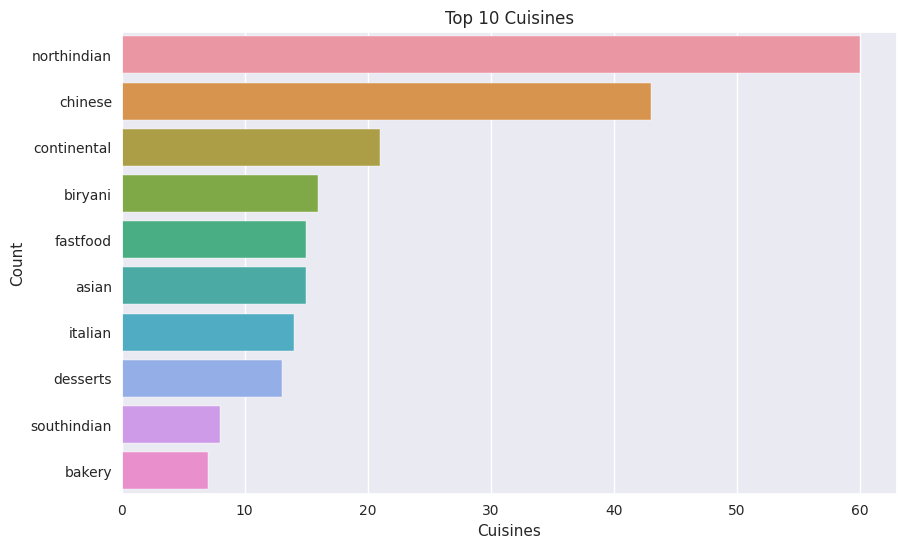

In [125]:
# Count the occurrences of each cuisine and take the top 10
top_10 = pd.value_counts(all_cuisines)[:10]

# Create a bar plot
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(y=top_10.index, x=top_10.values, orient="h")
plt.title("Top 10 Cuisines")
plt.xlabel("Cuisines")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that, there are 2850 customers which are not churned which is 85.5% of the whole customers data given in the dataset. In other hand, 483 customers are churned which is 14.%% of the whold customers data given in the dataset.


14.5% customers are churned which might look like a small number, but once upon a time the 14.5% was 1.45% which has grown upto 14.5%. So, Immediate action should be taken.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customer churn is often referred to as customer attrition, or customer defection which is the rate at which the customers are lost. Telecom companies often use customer churn as a key business metrics to predict the number of customers that will leave a telecom service provider. Churn is significant in the telecommunication industry because it directly affects the competitiveness of the service provider.

It's easy to loss customers but too difficult to aquire one. One churned cutomer will make 3-4 customers away those might be acquired by your teleservice provider
with "POWER OF WORDS".

When Jio provided free internnet services to everyone, and started acquiring maximum number of customers, so cutomer churn rate for other teleservice providers increased and customers from other teleservice providers those who converted to JIO spread the benefit of JIO to their relatives and friends and they also converted too easily. So, "POWER OF WORDS" also comes into action that wrong and bad reviews spread first.

#### Chart - 2 - State Vs. Average True Churn Percentage (Bivariate with Categorical - Numerical)

In [ ]:
# Chart - 2 visualization code
# Showing Average True Churn Percentage state wise
# Showing top 10 churned state
print((dataset.groupby(['State'])['Churn'].mean()*100).sort_values(ascending = False).reset_index(name="Average True CHurn %").head(10))
print(" ")

# State vs. average true churn percantage visualization code
# Vizualizing top 10 churned state
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((dataset.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(10).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

In [ ]:
# Showing Average True Churn Percentage state wise
# Showing top 10 churned state
print((dataset.groupby(['State'])['Churn'].mean()*100).sort_values(ascending = True).reset_index(name="Average True CHurn %").head(10))
print(" ")



# State vs. average true churn percantage visualization code
# Vizualizing bottom 10 churned state
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((dataset.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = True).head(10).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

There are 51 states having different churn rates .

**CA, NJ ,TX , MD ,SC ,MI, MS, NV, WA, ME**  are the ones who have higher churn rate more then 21.74% which is more than 50% of average churn rate.

Under the Data wrangling, I have defined a hypothetical logic for some states with poor network region and some states where service needs to be maintained or new installations required. So, here states
**[ ' NV ', ' NJ ' ]** are common which are in top 10 churned states.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the data of state wise churning depicts that 10% of a large state is same as 20% of a smaller state. So, we can't neglect the churn rates and will have to sagreggate based on the area covereage in respective states. Still, priotizing to actionable tasks we should try to figure out the issues in top 10 churning states first.

The issue might be poor network coverage or negligible maintaince on existing antenna, or total area coverage & no. of mobile tower or users is low or new towers needs to be installed to coverage additional areas.

#### Chart - 3 - Account Length with Churn Wise (Univariate)

In [ ]:
# Chart - 3 visualization code
# One Digit Account Length
print(dataset[dataset['Account length']<=9].loc[:,['Churn']].value_counts())
print(" ")

# Visualizing One Digit Account Length Based on Churn percentage
dataset[dataset['Account length']<=9].loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

In [ ]:
# Two Digit Account Length
print(dataset[(dataset['Account length']<=99) & (dataset['Account length']>=10)].loc[:,['Churn']].value_counts())
print(" ")

# Visualizing Two Digit Account Length Based on Churn percentage
dataset[(dataset['Account length']<=99) & (dataset['Account length']>=10)].loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

In [ ]:
# Three Digit Account Length
print(dataset[(dataset['Account length']<=dataset['Account length'].max()) & (dataset['Account length']>=100)].loc[:,['Churn']].value_counts())
print(" ")

# Visualizing Three Digit Account Length Based on Churn percentage
dataset[(dataset['Account length']<=dataset['Account length'].max()) & (dataset['Account length']>=100)].loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

In [ ]:
# Box Plot for Account Length attribute
dataset.boxplot(column='Account length',by='Churn')

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the churn percentage account length wise.

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers. So, I used box plot to get the maximum and minimum value with well sagreggated outliers with well defined mean and median as shown in the box plot graph.

##### 2. What is/are the insight(s) found from the chart?

**Account Length**

We can catagories Account Length into three catagories like

**One Digit Length**

 Churn True -8.3%

 No. of Churn True-2



 Churn False-91.7%

**Two Digit Length**

Churn True -14.0%

No. of Churn True-225



Churn False-86.0%


**Three Digit Length**

Churn True -15.0%

No. of Churn True-256



Churn False-85.0%




**REMARK**


AS from the above  record, we can see that Two digit Account Length customers are churning with a number of 225
And Three digit Account Length customers are churning with a number of 256





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Accoun length is the no. of days the customers are active. So for the new customers those churning rate is too low around 8.3% in percentage and number is 2. They might be just using the telecom service to experience the benefits and they might not be satisfied with the service provided and churned.

Those people whose account length are between 10 to 99 are having a churning rate of 15%. The customers below 50 might be treated as new customers and more than 55 and less than 99 they mightn't be geting benefits from plan taken.

Those people whise account length are more than 100 are like of old customers and they might be churning due to no additional offers given to them like power plus plan or other benefits.

So, Yes Account Length is also depicting a clear view of churing reasons and inaights.

#### Chart - 4 - Area Code (Bivariate)

In [ ]:
# Chart - 4 visualization code
# Area Code wise average churn Percentage
print(dataset.groupby('Area code')['Churn'].mean()*100)
print(" ")

# Visualizing code for Area Code wise average churn percentage
a1= list(['408','415' , '510'])
b1= dataset.groupby('Area code')['Churn'].mean()*100
plt.bar(a1,b1, color=['r','b','g'])

plt.rcParams['figure.figsize'] = (6, 5)


plt.xlabel('Area code', fontsize = 15)
plt.ylabel('churn percentage', fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of true churn with respect to Area Code, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

All Area Code have around 14% Churn rate. So, Area Code doesn't matter.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, Area Code doesn't have any contribution to churn rate for 14% churn rate is same for all the area codes. But while furthur sagreggating the area codes with respective states in those area code, it can be analysed the states in which the issue is happeing. So, it has been defined above.

So, here Area code won't help to create business impact but the respective states wise analysis can help.

#### Chart - 5 - International Plan (Univariate + Bivariate)

In [ ]:
# Chart - 5 visualization code
# Visualizing Percentage of customers taken international plan
dataset['International plan'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

In [ ]:
# Assigning values for furthur charts
i1 = dataset['International plan'].unique()
i2 = dataset.groupby('International plan')['Churn'].mean()*100
i3 = dataset.groupby(['International plan'])['Total intl charge'].mean()
i4 = dataset.groupby(["Churn"])['Total intl minutes'].mean()

In [ ]:
# Visualizing code for people churning percentage having international plan
plt.rcParams['figure.figsize'] = (6, 7)

plt.bar(i1,i2 , color=['b','r'])

plt.title(" Percentage of people leaving", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

In [ ]:
# Visualizing code for average calling charge of customers having international plan
plt.rcParams['figure.figsize'] = (6, 7)

plt.bar(i1,i3, color=['b','r'])
plt.title(" Average charge of people", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel(' charge', fontsize = 15)
plt.show()

In [ ]:
# Visualizing code for average minutes takled by customers having international plan
plt.rcParams['figure.figsize'] = (6, 7)

plt.bar(i1,i4, color=['b','r'])
plt.title(" Average minute people talk", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel(' Minutes', fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are used to represent the proportional data or relative data in a single chart. The concept of pie slices is used to show the percentage of a particular data from the whole pie.

Thus, I used to show the percentage of people taken international plan through pie chart with differentr colored area under a circle.

A bar chart is used when you want to show a distribution of data points or perform a comparison of metric values across different subgroups of your data. From a bar chart, we can see which groups are highest or most common, and how other groups compare against the others.

Thus, I used bar chart to show the percentage of customers churned having international plan and the avergae calling charge as well as conversation average minutes of customers those have international plan.

##### 2. What is/are the insight(s) found from the chart?

**INTERNATIONAL PLAN**

3010 dont have a international plan

323 have a international plan

Among those who  have a international plan 42.4 % people churn.

Whereas among those who dont have a international plan  only 11.4 % people churn.

Among those who  have a international plan their average charge is 2.86 and they talk for 10.7 minutes average .

Whereas among those who dont have a international plan their average charge is 2.75 and they talk for 10.15 minutes average .

The reason why people having international plan might be leaving is that they are [paying same amount of money for international calls as for those customers who dont have a international plan.Hence they arent getting any benefits for having an international plan so they might be unhappy.


***Customers with the International Plan tend to churn more frequently ***


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights found will definitely help for a positive business impact. Thsoe people who  have international plan they are paying some additional charges to get the plan but the talk time value charge is same as those customers having no international plan. That's might be great reason for more churns those having international plan.

#### Chart - 6 - Voice Mail (Univariate + Bivariate)

In [ ]:
# Chart - 5 visualization code
# vizualizing code for customers percentage having voice mail plan
dataset['Voice mail plan'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

In [ ]:
# Vizualizing code for customers churning while having voice mail plan
plt.rcParams['figure.figsize'] = (6, 7)

cc1=list(['no','yes'])
cc2=dataset.groupby('Voice mail plan')['Churn'].mean()*100
plt.bar(cc1,cc2, color=['b','r'])

plt.title(" Percentage of people leaving", fontsize = 20)
plt.xlabel('Voice mail plan', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart is a type of graph in which a circle is divided into sectors that each represents a proportion of the whole. Pie charts are a useful way to organize data in order to see the size of components relative to the whole, and are particularly good at showing percentage or proportional data.

Thus, I have used pie chart to show the percentage of customers having voice mail plan.

The bar graph is used to compare the items between different groups over time. Bar graphs are used to measure the changes over a period of time.

Thus, I have used bar chart to show the percentage of customers churned having voice mail plan.

##### 2. What is/are the insight(s) found from the chart?

**VOICE MAIL**

2411 dont have a voice mail plan

922 have a voice mail plan

Among those who dont have a voice mail 16.7 % people churn.

Whereas among those who have a voice mail plan only 8.7 % people churn.

**Hypothesis Based on Voice Mail**
* Customers sending less number of voicemails either as per their Requirement or There would be less Network Stability at that place for which they won't be able to send the voice message successfully.

***Customers  with the Voice Mail Plan tend to churn less frequently ***

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Voice mail plan doesn't have that much impact in business untill the hypothesis has been proven. If the hypothesis remains true, we need to take care of the respective states where there is less network stability or the states the towers needs either maintainance or new towers should be installed.

yes, voice mail plan might be considered partially.

#### Chart - 7- Overall Calls (Bivariate)

In [ ]:
# Chart - 7 visualization code
# Geeting means of churn vs total day calls, total day minutes, total day charge
print(dataset.groupby(["Churn"])['Total day calls'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total day minutes'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total day charge'].mean())

# 18% more min    18% more charge    no insight

In [ ]:
# Vizualizing Total day minutes vs total day charge
cdd = sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn", data=dataset)


In [ ]:
# Geeting means of churn vs total eve calls, total eve minutes, total evening charge
print(dataset.groupby(["Churn"])['Total eve calls'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total eve minutes'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total eve charge'].mean())

In [ ]:
# Vizualizing total evening minutes vs total evening charge
cdd = sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=dataset)

In [ ]:
# Getting means of churn vs total night calls, total m=night minutes, total night charge
print(dataset.groupby(["Churn"])['Total night calls'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total night minutes'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total night charge'].mean())

In [ ]:
# Vizualizing Total nights minutes vs total night charge
cdd = sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data=dataset)

In [ ]:
# Import pandas library
import pandas as pd

# initialize list of lists
data1 = [['Total day minutes',175.17 , 206.91], ['Total day charge',29.78, 35.17]]

#7.012,6.12,6.86

# Create the pandas DataFrame
minutes_code1 = pd.DataFrame(data1, columns = ['day', 'dont churn',' churn'])

# print dataframe.
minutes_code1

In [ ]:
# Vizualizing code for the above created dataframe
plt.rcParams['figure.figsize'] = (8, 6)


minutes_code1.plot(kind='bar', x='day',ylabel='mean  ')

In [ ]:
# Import pandas library
import pandas as pd

# initialize list of lists
data2 = [ ['Total eve minutes',199.04, 212.41], ['Total night minutes',200.13,205.23]]

#7.012,6.12,6.86

# Create the pandas DataFrame
minutes_code2 = pd.DataFrame(data2, columns = ['minutes', 'dont churn',' churn'])

# print dataframe.
minutes_code2

In [ ]:
# Vizualizing teh above created dataframe
plt.rcParams['figure.figsize'] = (8,6)


minutes_code2.plot(kind='bar', x='minutes',xlabel='minutes',ylabel='mean of churn ')

In [ ]:
# Import pandas library
import pandas as pd

# initialize list of lists
data3 = [ ['Total eve charge',16.91, 18.05], ['Total night charge',9,9.23]]

#7.012,6.12,6.86

# Create the pandas DataFrame
minutes_code3 = pd.DataFrame(data3, columns = ['charge', 'dont churn',' churn'])

# print dataframe.
minutes_code3

In [ ]:
# Vizualizing code for the above dataset
plt.rcParams['figure.figsize'] = (8,6)


minutes_code3.plot(kind='bar', x='charge',ylabel='mean charge')

##### 1. Why did you pick the specific chart?

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

Thus, I have used the scatter plot to depict the relationship between evening, day &n night calls , minutes and charge.

The bar graph is used to compare the items between different groups over time. Bar graphs are used to measure the changes over a period of time. When the changes are larger, a bar graph is the best option to represent the data.

Thus, I have used the bar plot to show the evening, night and day manipulated data to depict meaningful insights.

##### 2. What is/are the insight(s) found from the chart?

**OVERALL CALLS**

Churn customers speak more minutes that non-churn customers at day,evening and night. Hence they pay more charge that non-churn customers.

We can retain churn customers if we include master plan.
In master plan if a customer is talking more minutes then we can charge a little less amount from him or he can get discount or additional few free minutes to talk.

This will make customers who are going to churn happy and they will not leave the company.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For telecom service provider calling and messaging are two essential product plans. Thus, optimizing voice call plans will definitely create a business impact. Those who are using just calling service must be provided som additional offers either in talktime or powerplus plan. Those who use voice call plan for night only, we might offer some exciting plans from midnight 12 to morning 6. For customers those who have higher accout length should be provided exciting offers as they are our loyal customers. churing of higher account length customer will have a negative impact on business.


#### Chart - 8 - Customer Service Calls (Bivariate)

In [ ]:
# Chart - 8 visualization code
# Visualizing churn rate per customer service calls
plt.rcParams['figure.figsize'] = (12, 8)


s1=list(dataset['Customer service calls'].unique())
s2=list(dataset.groupby(['Customer service calls'])['Churn'].mean()*100)
plt.bar(s1,s2, color = ['violet','indigo','b','g','y','orange','r'])


plt.title(" Churn rate per service call", fontsize = 20)
plt.xlabel('No of cust service call', fontsize = 15)
plt.ylabel(' percentage', fontsize = 15)
plt.show()


##### 1. Why did you pick the specific chart?

The bar graph is used to compare the items between different groups over time. Bar graphs are used to measure the changes over a period of time. When the changes are larger, a bar graph is the best option to represent the data.

Thus, I have used the bar plot to show the relationship between churn rate per customer service calls.

##### 2. What is/are the insight(s) found from the chart?

**CUSTOMER SERVICE CALL**

The service calls of customers varies from 0 to 9 .

Those customers who make more service calls they have a high probability of leaving.

As we can see from graph , customers with more then 5 service calls their probability of leaving is more then 50 %.

Hence customers who make more then 5 service calls, their queries should be solved immediately and they should be given better service so that they dont leave the company.

***Customers with four or more customer service calls churn more than four times as often as do the other customers***

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customer service is an essential factor for every business. SO definitely good customer service will have a positive impact to the business. We have to look afted the customer calls and customer query report resolution duration. Need to optimize the time period. If one type of issue is coming from more than 5 customers, root cause analysis should be done on that same issue and should be resolved for everyone.
Need to reduce the calls for each customer and he should be satisfied in a single call only. The customer service agents should be given great offer or recognition over great performance of customer issue resolution.

#### Chart - 9 - Column wise Histogram & Box Plot Univariate Analysis

In [ ]:
# Chart - 9 visualization code
# Visualizing code of hist plot for each columns to know the data distibution
for col in dataset.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (dataset[col])
  sns.distplot(dataset[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

# Visualizing code of box plot for each columns to know the data distibution
for col in dataset.describe().columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot( col, ax = ax)
    ax.set_title('Label by ' + col)
    #ax.set_ylabel("Churn")
plt.show()


##### 1. Why did you pick the specific chart?

The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

Almost all columns are symmetric distributed and mean is nearly same with median for numerical columns. Here Area code will be treated as text values as there are only 3 values in the particular column.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Just a histogram and box plot cannot define business impact. It's done just to see the distribution of the column data over the dataset.

#### Chart - 10 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
corr = dataset.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From the above correlation heatmap, we can see total day charge & total day minute, total evening charge & total evening minute, total night charge & total night minute are positiveliy highly correlated with a value of 1.

Customer service call is positively correlated only with area code and negative correlated with rest variables.

Rest all correlation can be depicted from the above chart.


#### Chart - 11 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(dataset, hue="Churn")

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know, there are less linear relationship between variables and data poiunts aren't linearly separable. Churned customers data is clusetered and ovearlapped each other. Non churn data are quite symmetrical in nature and churned customer data are quite non symmetric in nature. In this whole pair plot, the importance of area code can be seen and the number of churn with respect to different features are really insightful. Rest insights can be depicted from the above graph.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Customers not churning with Voicemail plan have sent average of at least 30 number of voicemails.
2. Customers not churning having  customer care calls average of at most 2.
3. Customers churning have total average call minutes including day, evening, night and international calls is 215.

In [ ]:
# Creating Parameter Class
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value




# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

### Hypothetical Statement - 1
Customers not churning with Voicemail plan have sent average of at least 30 number of voicemails.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 30

Alternate Hypothesis : N < 30

Test Type: Left Tailed Test


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_1=dataset[(dataset["Churn"]==False) & (dataset["Voice mail plan"]=="Yes")]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 30
sample_mean = hypo_1["Number vmail messages"].mean()
size = len(hypo_1)
std=(variance(hypo_1["Number vmail messages"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypo_1,col="Number vmail messages")
# Getting Conclusion
print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Customers not churning with Voicemail plan haven't sent at least 30 number of voicemails. But, we can see a maximum of 50 voice mails sent and sutomers aren't taking benefits of 50 messages although they have taken Voice Mail Plan.

##### Why did you choose the specific statistical test?

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_1["Number vmail messages"])
sns.distplot(hypo_1["Number vmail messages"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

As shown in the figure the mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 2
Customers not churning having customer care calls average of at most 4.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : N = 4

Alternate Hypothesis : N > 4

Test Type : Right Tailed Test



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_2=dataset[(dataset["Churn"]==False)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 2
sample_mean = hypo_2["Customer service calls"].mean()
size = len(hypo_2)
std=(variance(hypo_2["Customer service calls"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r',t="false",hypothesis_number=hypothesis_number,df=hypo_2,col="Customer service calls")
# Getting Conclusion
print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis can't be rejected and Customers not churning having customer care calls average of at most 2. So, we can see a clear picture that average of 2-2.5 doesn't lead to customer churn. So, we should keep the customer queries resolution call average in betwwen 2-2.5.

##### Why did you choose the specific statistical test?

In [ ]:
mean_median_difference=hypo_2["Customer service calls"].mean()- hypo_2["Customer service calls"].median()
print("Mean Median Difference is :-",mean_median_difference)

As shown above the Mean median difference is around 0.4 and nearly zero. Mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 3
Customers churning have total average call minutes including day, evening, night and international calls is 215.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : mean = 215

Alternate Hypothesise : mean != 215

Type of Test : Two Tailed test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_3=dataset[(dataset["Churn"]==True)]
hypo_3["total call minutes"]=hypo_3["Total day minutes"]+hypo_3["Total eve minutes"]+hypo_3["Total night minutes"]+hypo_3["Total intl minutes"]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 500
sample_mean = hypo_3["total call minutes"].mean()
size = len(hypo_3)
std=(variance(hypo_3["total call minutes"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='d',t="true",hypothesis_number=hypothesis_number,df=hypo_3,col="total call minutes")
# Getting Conclusion
print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

I have used T-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Customers churning haven't total average call minutes including day, evening, night and international calls is 215. It's more than 600.

##### Why did you choose the specific statistical test?

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_3["total call minutes"])
sns.distplot(hypo_3["total call minutes"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

In [ ]:
mean_median_difference=hypo_3["total call minutes"].median()- hypo_3["total call minutes"].mean()
print("Mean Median Difference is :-",mean_median_difference)

From the above chart we can see median is greater than mean over 10. So, the distribution is postively skewed. For a skewed data Z-Test can't be performed.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

So, for a skewed data we can use T-test for better result. Thus, I used t - test.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
# Creating a copy of the dataset for further feature engineering
df=dataset.copy()

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
df["Area code"]=df["Area code"].astype('str')
symmetric_feature=[]
non_symmetric_feature=[]
for i in df.describe().columns:
  if abs(df[i].mean()-df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

# Removing Customer Service Calls column from the list as it's an important factor
# which can't be treated as outliers here will is already leading to higher churn as we have seen furing analysis.
non_symmetric_feature.pop()


In [ ]:
# For Symmetric features defining upper and lower boundry
def outlier_treatment(df,feature):
  upper_boundary= df[feature].mean()+3*df[feature].std()
  lower_boundary= df[feature].mean()-3*df[feature].std()
  return upper_boundary,lower_boundary

In [ ]:
# Restricting the data to lower and upper boundry
for feature in symmetric_feature:
  df.loc[df[feature]<= outlier_treatment(df=df,feature=feature)[1], feature]=outlier_treatment(df=df,feature=feature)[1]
  df.loc[df[feature]>= outlier_treatment(df=df,feature=feature)[0], feature]=outlier_treatment(df=df,feature=feature)[0]

In [ ]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-3*IQR
  upper_bridge =df[feature].quantile(0.25)+3*IQR
  return upper_bridge,lower_bridge

In [ ]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  df.loc[df[feature]<= outlier_treatment_skew(df=df,feature=feature)[1], feature]=outlier_treatment_skew(df=df,feature=feature)[1]
  df.loc[df[feature]>= outlier_treatment_skew(df=df,feature=feature)[0], feature]=outlier_treatment_skew(df=df,feature=feature)[0]

In [ ]:
# After Outlier Treatment showing the dataset distribution using strip plot
# Visualising  code for the numerical columns
for col in df.describe().columns:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(df[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

First I changed the Area Code column to sring as it shouldn't be treated as numerical column as there are only three type of values and should be treated as categorical column. Then I separated the skew symmetric and symmetric features and define the upper and lower boundry as defined below. Again, as it is a classification problem I restrict the both bopundaries and I pull down the higher value restricted to the upper limit, i.e., if a person is churning with the value 150 for any column but IQR and upper boundary range is 140, so quite possible that he will also be churned for 140 too and restricting the value to 140 which is upper boundary.

Another way to do it is dropping extreme values but I didn't do that due to less no. of datapoints I have.

In a Gaussian distribution while it’s the symmetric curve and outlier are present. Then, we can set the boundary by taking standard deviation into action.

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:
1.	lower inner fence: Q1–1.5*IQ
2.	upper inner fence: Q3 + 1.5*IQ
3.	lower outer fence: Q1–3*IQ
4.	upper outer fence: Q3 + 3*IQ


### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Getting the categorical columns
categorical_columns=list(set(df.columns.to_list()).difference(set(df.describe().columns.to_list())))
print("Categorical Columns are :-", categorical_columns)

In [ ]:
# Getting dictionaries for Label Encoding
dict1={True:1,False:0}
dict2={"Yes":1,"No":0}
area_code_list=sorted(list(df["Area code"].unique()))
dict3=dict(zip(area_code_list,range(0,len(area_code_list))))

In [ ]:
# Label Encoding in the dataset
# df['Churn']=df['Churn'].map(dict1)
df['International plan']=df['International plan'].map(dict2)
df['Voice mail plan']=df['Voice mail plan'].map(dict2)
df['Area code']=df['Area code'].map(dict3)

In [ ]:
# One Hot Encoding on State Column
df=pd.get_dummies(df,drop_first= True)

In [ ]:
df["Churn"]

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used Label Encoding technique for Churn, Area Code, Voice Mail & International Plan column and One Hot Encoding for State Column. As we have seen during analysis, that State date is very very important and we also created some hypothesis based on our logics that there are some states which have poor network issues or maintainence needed there. So, We can ignore the State Column. Thus One hot encoded on that column, and for rest categorical columns, I have used label encoding, because there are only 2-3 unique values in each column which needed to be encoded.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

**There are no text columns in the given dataset which I am working on. So, Skipping this part.**

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Creating call duration column for customers with no international plan
df['Days_1call_duration']=df['Total day minutes']/df['Total day calls']
df['intern_1call_duration']=df['Total intl minutes']/df['Total intl calls']

df['evening_1call_duration']=df['Total eve minutes']/df['Total eve calls']
df['night_1call_duration']=df['Total night minutes']/df['Total night calls']

# Creating price rate per minute column for customers with international plan
df['international_rate_per_min']=df['Total intl charge']/df['Total intl minutes']
df['day_rate_per_min']=df['Total day charge']/df['Total day minutes']
df['eve_rate_per_min']=df['Total eve charge']/df['Total eve minutes']
df['night_rate_per_min']=df['Total night charge']/df['Total night minutes']


In [ ]:
np.isinf(df).values.sum()
df.replace([np.inf, -np.inf], 0, inplace=True)

Created Some new features like Call duration and call charges for all day, evening, night and international calls.

#### 2. Feature Selection

In [ ]:
# Checking the shape of dataset
df.shape

In [ ]:
# Dropping Constant and Quasi Constant Feature
def dropping_constant(data):
  from  sklearn.feature_selection import VarianceThreshold
  var_thres= VarianceThreshold(threshold=0.05)
  var_thres.fit(data)
  concol = [column for column in data.columns
          if column not in data.columns[var_thres.get_support()]]
  if "Churn" in concol:
    concol.remove("Churn")
  else:
    pass
  df_removed_var=data.drop(concol,axis=1)
  return df_removed_var

In [ ]:
# Calling the function
df_removed_var=dropping_constant(df)

In [ ]:
# Checking the shape after feature dropped
df_removed_var.shape

In [ ]:
# Getting important column names
dataset_columns_required=dataset.columns.to_list()[1:-1]
dataset_columns_required.extend(['Days_1call_duration','intern_1call_duration','evening_1call_duration','night_1call_duration','international_rate_per_min','day_rate_per_min','eve_rate_per_min','night_rate_per_min'])

In [ ]:
# Correlation Heatmap visualization code
corr = df_removed_var.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [ ]:
# Checking Variable Inflation Factor
# the independent variables set
X = df_removed_var.copy()

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

for i in range(len(vif_data)):
  vif_data.loc[i,"VIF"]=vif_data.loc[i,"VIF"].round(2)
  if vif_data.loc[i,"VIF"]>=8:
    print(vif_data.loc[i,"feature"])


In [ ]:
# Check Feature Correlation and finding multicolinearity
def correlation(df,threshold):
  col_corr=set()
  corr_matrix= df.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range(i):
      if abs (corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return list(col_corr)



In [ ]:
# Getting multicolinear columns and dropping them
highly_correlated_columns=correlation(df_removed_var,0.5)

if "Churn" in highly_correlated_columns:
  highly_correlated_columns.remove("Churn")
else:
  pass

df_removed=df_removed_var.drop(highly_correlated_columns,axis=1)
df_removed.shape

In [ ]:
# Correlation after dropping the required columns
# Correlation Heatmap visualization code
corr = df_removed.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Creating call duration column for customers with no international plan
df_removed['Days_1call_duration']=df_removed['Total day minutes']/df_removed['Total day calls']
df_removed['intern_1call_duration']=df_removed['Total intl minutes']/df_removed['Total intl calls']

df_removed['evening_1call_duration']=df_removed['Total eve minutes']/df_removed['Total eve calls']
df_removed['night_1call_duration']=df_removed['Total night minutes']/df_removed['Total night calls']

df_removed.drop(['Total day minutes','Total day calls','Total intl minutes','Total intl calls','Total eve minutes','Total eve calls','Total night minutes','Total night calls'],axis=1,inplace=True)

In [ ]:
# Replacing Infinite and null values
np.isinf(df_removed).values.sum()
df_removed.replace([np.inf, -np.inf], 0, inplace=True)

In [ ]:
# Checking correlation between new manipulated features
# Correlation Heatmap visualization code
corr = df_removed.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [ ]:
# Again checking VIF post-dropped features
# the independent variables set
X = df_removed.copy()

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

for i in range(len(vif_data)):
  vif_data.loc[i,"VIF"]=vif_data.loc[i,"VIF"].round(2)
  if vif_data.loc[i,"VIF"]>=8:
    print(vif_data.loc[i,"feature"])


In [ ]:
# After Feature Selection checking the shape left with
df_removed.shape

##### What all feature selection methods have you used  and why?

I used Dropping Constant Feature, Dropping columns having multicolinearity and validate through VIF.

Feature Selector that removes all low variance features. This feature selection algorithm looks only at the features(X), not the desired outputs(Y), and can be used for unsupported learning.

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”

Pearson correlations are suitable only for metric variables The correlation coefficient has values between -1 to 1

• A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

• A value closer to 1 implies stronger positive correlation

• A value closer to -1 implies stronger negative correlation

Collinearity is the state where two variables are highly correlated and contain similar information about the variance within a given dataset. To detect collinearity among variables, simply create a correlation matrix and find variables with large absolute values.

Steps for Implementing VIF

• Calculate the VIF factors.

• Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

1st I dropped columns having constant or quasi constant variance. Then using pearson corelation I removed the columns having multicolinearity and again validate the VIFs for each feauture and found some features having VIF of more than 5-10 and I considered it to be 8 and again manipulated some features and again dropped multicolinear columns to make the VIF less than 8. The features got decreased from 77 to 10.

##### Which all features you found important and why?

In [ ]:
df_removed.columns

In [ ]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  model= RandomForestClassifier(n_estimators=550)
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  # Plot the feature importances in bars
  # final_df.plot.bar(color='teal')
  return final_df

In [ ]:
# Getting feature importance of selected features
randomforest_embedded(x=df_removed.drop(["Churn"],axis=1),y=df["Churn"])

Finally I found out 9 indepenedent features which are important and valdate their importances through Embedded method using random forest classifier feature importance. All the features which i left with having some importances and none of them are 0. So, It validates the features make sense and heading towards the right direction.

### 5. Data Transformation

In [ ]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_removed.describe().columns:
  if abs(df_removed[i].mean()-df_removed[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)
# Removing Customer Service Calls column from the list as it's an important factor
# which can't be treated as outliers here will is already leading to higher churn as we have seen furing analysis.
non_symmetric_feature.remove('Churn')
non_symmetric_feature.remove('Customer service calls')
non_symmetric_feature.remove('Voice mail plan')
# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# Exponential Transforming the required column
df_removed['intern_1call_duration']=(df_removed['intern_1call_duration'])**0.25
df_removed['evening_1call_duration']=(df_removed['evening_1call_duration'])**0.25

In [ ]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in df_removed.loc[:,non_symmetric_feature]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

From the features, I got to know that there are 2 features which aren't symmetric so aren't following gaussian distribution and rest are having szymmetric curve. Thus, for those two columns I have used Exponential transformation to achieve gaussian distribution.

 I tried with other transformations and found exponetial tranformation with no infinity value and working fine. So, I am continuing with Exponentia lransformation with a power of 0.25.


### 6. Data Scaling

In [ ]:
# Scaling your data
# Checking the data
df_removed.head()

In [ ]:
# Visualizing code of hist plot for each columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (df_removed["Account length"])
sns.distplot(df_removed["Account length"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title("Account length")
plt.show()

##### Which method have you used to scale you data and why?

In [ ]:
# Standardizing the required column
df_removed["Account length"] = StandardScaler().fit_transform(df_removed["Account length"].values.reshape(-1, 1))

In [ ]:
# Checking the dataset
df_removed.head()

When you are using an algorithm that assumes your features have a similar range, you should use feature scaling.

If the ranges of your features differ much then you should use feature scaling. If the range does not vary a lot like one of them is between 0 and 2 and the other one is between -1 and 0.5 then you can leave them as it's. However, you should use feature scaling if the ranges are, for example, between -2 and 2 and between -100 and 100.

Use Standardization when your data follows Gaussian distribution.
Use Normalization when your data does not follow Gaussian distribution.

So, in my data only Account Length column having large data difference and following gaussian distribution. That's why, I have used standardization using atandardscaler.


### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As per my knowledge, for this dataset dimensionality reduction is not required.

Essentially where high dimensions are a problem or where it is a particular point in the algorithm to dimension reduction.

Hard rules are hard to state, other than “after you have tried it, did it improve matters”, which isn’t always the most useful guidance.

Instead, looking at why we might want to do this we can get a bit of insight. Admittedly some of the following might blur together a bit at the edges but the aim is to give a flavour.

1. Our data are too big. 4 million rows. 50,000 columns… is there a lot of redundancy there? Building a model on this could be very expensive. Even relatively simple dimension reduction techniques like PCA can capture almost all of the information in a fraction of the memory if there are strong relationships (that can be linearly approximated) in the data.

2. We are over-fitting. If you build a model with tens of thousands of degrees of freedom but don’t have a lot of examples you can easily overfit. Dimension reduction is one way of handling this, though often not the the best

3. We want to bring in external data. OK, this is a bit different but worth a note. In applications like word2vec we want to build a classifier using an embedding. We may want to classify some text into different categories but with only a limited number of examples. The complexity of free text is vast but a low dimension embedding is much smaller and will not overfit so badly in a classifier. Building a low dimensional embedding on external text, applying it to the text to be classified then building a classifier is using dimension reduction to bring in external data.

4. We suffer from the curse of dimesnionality. Consider something like a nearest neighbour search. As the number of dimensions gets large we see some unwanted behaviour, especially if we are looking at things like euclidean distances. Projecting your data to a lower dimensional space for nearest neighbour, clustering or outlier detection can be both more robust and more meaningful.

5. Some tools are all about this. Collaborative filtering through matrix factorisation is an example. Can we approximately describe behaviour as a linear combination of a smaller number of preferences/behaviours?

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split your data to train and test. Choose Splitting ratio wisely.
 # split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(df_removed.drop("Churn",axis=1),df_removed["Churn"], test_size = 0.3, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

##### What data splitting ratio have you used and why?

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

In this case the training dataset is small, that's why I have taken 70:30 ratio.

### 9. Handling Imbalanced Dataset

In [ ]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(dataset.Churn.value_counts())
print(" ")
# Dependant Variable Column Visualization
dataset['Churn'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Churn(%)','Churn(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different the classes is different:
If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In our case the dataset dependent column data ratio is 85:15. So, during model creating it's obvios that there will be bias and having a great chance of predicting the majority one so frequently. SO the dataset should be balanced before it going for the model creation part.

In [ ]:
# Handling Imbalanced Dataset (If needed)
# Handaling imbalance dataset using SMOTE
# sm = SMOTE(random_state=42)
# X_train, y_train = sm.fit_resample(X_train, y_train)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used SMOTE (Synthetic Minority Over-sampling technique) for balanced the 85:15 dataset.

SMOTE is a technique in machine learning for dealing with issues that arise when working with an unbalanced data set. In practice, unbalanced data sets are common and most ML algorithms are highly prone to unbalanced data so we need to improve their performance by using techniques like SMOTE.

To address this disparity, balancing schemes that augment the data to make it more balanced before training the classifier were proposed. Oversampling the minority class by duplicating minority samples or undersampling the majority class is the simplest balancing method.

The idea of incorporating synthetic minority samples into tabular data was first proposed in SMOTE, where synthetic minority samples are generated by interpolating pairs of original minority points.

SMOTE is a data augmentation algorithm that creates synthetic data points from raw data. SMOTE can be thought of as a more sophisticated version of oversampling or a specific data augmentation algorithm.

SMOTE has the advantage of not creating duplicate data points, but rather synthetic data points that differ slightly from the original data points. SMOTE is a superior oversampling option.

That's why for lots of advantages, I have used SMOTE technique for balancinmg the dataset.


## ***7. ML Model Implementation***

### ML Model - 1 - **Implementing Logistic Regression**

In [ ]:
# ML Model - 1 Implementation
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
clf.fit(X_train, y_train)

In [ ]:
# Checking the coefficients
clf.coef_

In [ ]:
# Checking the intercept value
clf.intercept_

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

I used Logistic regression algorithm to create the model. As I got not so good result.

For training dataset, i found precision of 98% and recall of 87% and f1-score of 92% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 18% and recall of 57% and f1-score of 27%. Accuracy is 86% and average percision, recall & f1_score are 58%, 72% and 60% respectively with a roc auc score of 57%.

For testing dataset, i found precision of 98% and recall of 88% and f1-score of 93% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 17% and recall of 56% and f1-score of 27%. Accuracy is 87% and average percision, recall & f1_score are 58%, 72% and 60% respectively with a roc auc score of 57%.

Next tryting to improving the score by using hyperparameter tuning technique.



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LogisticRegression(max_iter=10000)
solvers = ['lbfgs']
penalty = ['10','l2','14','16','20','18']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Predict on the model
# Get the predicted classes
train_class_preds = grid_result.predict(X_train)
test_class_preds = grid_result.predict(X_test)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced.
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 98% and recall of 87% and f1-score of 92% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 19% and recall of 57% and f1-score of 28%. Accuracy is 87% and average percision, recall & f1_score are 58%, 72% and 60% respectively with a roc auc score of 58%.

Quite improvment seen in precsion, f1 score,accuracy and roc auc score for training dataset of 1%.

For testing dataset, i found precision of 98% and recall of 88% and f1-score of 93% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 19% and recall of 55% and f1-score of 28%. Accuracy is 87% and average percision, recall & f1_score are 58%, 72% and 60% respectively with a roc auc score of 58%.

Quite improvemnt seen in precsion, f1 score and roc auc of 1% but 1% decrement in recall.



### ML Model - 2 - **Implementing Random Forest Classifier**

In [ ]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

Then, I used Random Forest algorithm to create the model. As I got there is overfitting seen.

For training dataset, i found precision of 100% and recall of 100% and f1-score of 100% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 100% and recall of 100% and f1-score of 100%. Accuracy is 100% and average percision, recall & f1_score are 100%, 100% and 100% respectively with a roc auc score of 100%.

For testing dataset, i found precision of 98% and recall of 91% and f1-score of 94% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 38% and recall of 75% and f1-score of 50%. Accuracy is 90% and average percision, recall & f1_score are 68%, 83% and 72% respectively with a roc auc score of 67%.

Next tryting to improving the score by using hyperparameter tuning technique.

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='f1')


# Fit the Algorithm
rf_grid.fit(X_train,y_train)



# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_grid.predict(X_train)
test_class_preds = rf_grid.predict(X_test)


In [ ]:
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

In [ ]:

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

In [ ]:
# Hypertuned Random Forest
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced.
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 100% and recall of 87% and f1-score of 93% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 12% and recall of 93% and f1-score of 22%. Accuracy is 88% and average percision, recall & f1_score are 56%, 90% and 57% respectively with a roc auc score of 56%.

Quite improvment seen as no overfitting but the scores reduced by some percentages.

For testing dataset, i found precision of 100% and recall of 88% and f1-score of 93% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 13% and recall of 90% and f1-score of 23%. Accuracy is 88% and average percision, recall & f1_score are 56%, 89% and 58% respectively with a roc auc score of 56%.

Quite improvemnt seen in recall but rest scores have decreased.


### ML Model - 3 - **Implementing XgBoost Classifier**

In [ ]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

Then, I used XGBoost algorithm to create the model. As I got there  good result.

For training dataset, i found precision of 100% and recall of 91% and f1-score of 95% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 46% and recall of 95% and f1-score of 62%. Accuracy is 92% and average percision, recall & f1_score are 73%, 93% and 79% respectively with a roc auc score of 72%.

For testing dataset, i found precision of 99% and recall of 90% and f1-score of 94% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 35% and recall of 80% and f1-score of 48%. Accuracy is 90% and average percision, recall & f1_score are 67%, 85% and 71% respectively with a roc auc score of 66%.

Next tryting to improving the score by using hyperparameter tuning technique.

In [ ]:
importances = xg_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
features = X_train.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xg_grid1=xg_grid.fit(X_train,y_train)
# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_grid1.predict(X_train)
test_class_preds = xg_grid1.predict(X_test)

In [ ]:
print("Best: %f using %s" % (xg_grid.best_score_, xg_grid.best_params_))

In [ ]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced.
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

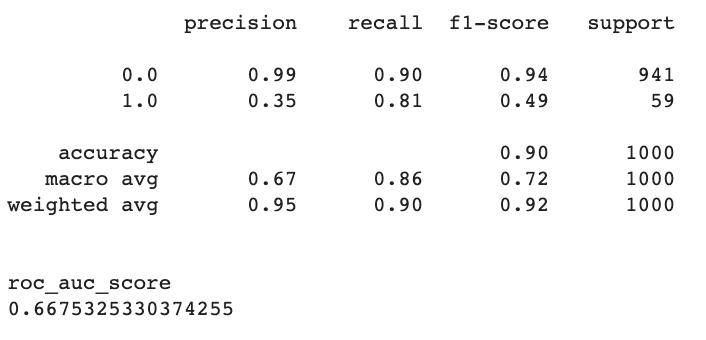

For training dataset, i found precision of 100% and recall of 91% and f1-score of 95% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 46% and recall of 95% and f1-score of 62%. Accuracy is 92% and average percision, recall & f1_score are 73%, 93% and 79% respectively with a roc auc score of 72%.

No improvement or decreament every score is constant as earlier.

For testing dataset, i found precision of 99% and recall of 90% and f1-score of 94% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 35% and recall of 81% and f1-score of 49%. Accuracy is 90% and average percision, recall & f1_score are 67%, 86% and 72% respectively with a roc auc score of 66%.

Quite improvemnt in recall, f1 score as well as average recall & f1 score by 1%.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I would like to go with both Recall and Precision and which describes both is F1 Score.

To reduce false negative recall is important and to reduce false positives precision is important. Where both are important to be minimized, f1_score is being considered. False Positive is defined as the model predicted that the customer will churn but the customer didn't churn. But according to our model it will churn so, there would be quite chance of his churning not for immediate but after some times. So, for those type of customers we can send them some beneficial modified offers to retain them. Again false negative defines as model will predict that the customer won't churn but the customer really churned. That will be an issue for us. So, for that case we have to minimize the false negative. and false positive we must improve the score of both precision as well as recall which should direclt affect the f1_score positively. So, in our case recall will stand the higher but precision can't be neglected. so, ***recall should be higher and f1_score should be moderate.***

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have choosen XGBoost model which is hyperparameter optimized. first of all I need accuracy for the churn prediction and time isn't a constrain here, beacuse the data is not lke swiggy or ola which booking needs to be faster. Thus, for greater accuracy we used kernel SVM, Random Forest, XgBoost kind of ensembel r=techniques. So, I tried both Random Forest and XGBoost. Here is their ealuation metrics and I would like to compare.

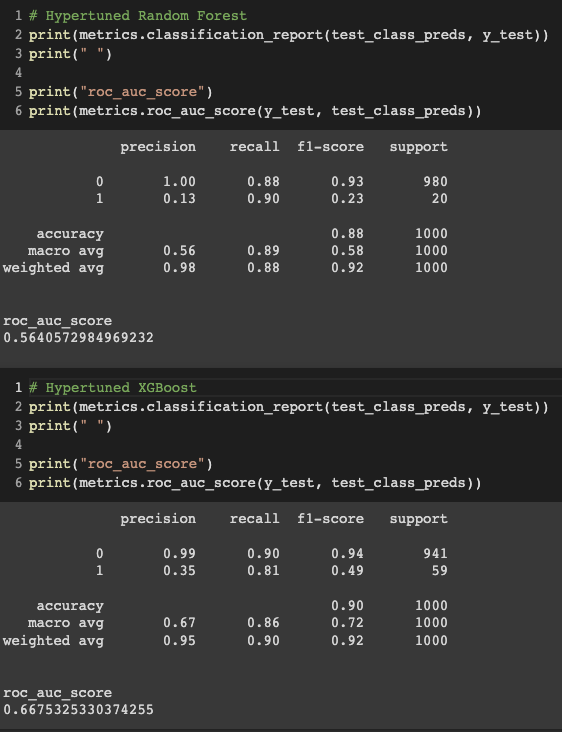

From the above snap shot, we can clearly see that for XGBoost has a improved score of f1_score over random forest. the accuracy and roc auc score is also improved for xg boost. The recall might be high in random forest but when it comes to precision and f1_score for True Churn Data scores, it's very low and even in averge scores of precision and f1_score is too low. In case of xgboost it's higher than that of random forest.

So, I have chosen XGBoost as the final prdiction model which should be deployed for real user interaction.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
#Get shap values
explainer = shap.Explainer(xg_models)
shap_values = explainer(X_test)

In [ ]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

To better understand this, let’s dive into our first SHAP plot. Above we have the code to create a waterfall plot for the first abalone in our dataset. This plot helps us visualise the SHAP values for each of the features. These tell us how much each of the features have increased or decreased the predicted number of rings for this specific abalone.

Looking at the x-axis, we can see the base value is E[f(x)] = -1.94. This is the average predicted number of rings across all 2967 abalones. The ending value is f(x) = -0.396. This is the predicted churn type for this abalone. The SHAP values are all the values in between. For example, the international plan  increased the predicted class of churn type by 1.03 when compared to the Account Length.

There will be a unique waterfall plot for every observation/abalone in our dataset. They can all be interpreted in the same way as above. In each case, the SHAP values tell us how much each factor contributed to the model’s prediction when compared to the mean prediction. Large positive/negative SHAP values indicate that the feature had a significant impact on the model’s prediction.

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

Another way to visualise SHAP values is using a force plot. These give us pretty much the same information as a waterfall plot in a straight line how the geatures are contributiong and the relationship between the features. If one value value increases res will compress. you can see we start at the same base value of -1.94.

In [ ]:
# Get expected value and shap values array
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X_test)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X_test.columns))

Waterfall and force plots are great for interpreting individual predictions. To understand how our model makes predictions in general we need to aggregate the SHAP values. One way to do this is using a decision plot. Above we have the code used to output the decision plot for the first 10 abalones.

we can see there are 10 lines in the plot —one for each abalone. They all start at the same base value of -1.94 and end at their final predicted number of rings. As you move up from each feature on the y-axis, the movement on the x-axis is given by the SHAP value for that feature. Ultimately, this gives you similar information to a waterfall plot except we can now see it for multiple observations.

With only 10 observations, we can already see some trends. For example, some of the lines seem to zig-zag at the top of the chart. For these observations, the shucked weight increases the prediction (i.e. positive SHAP) and the shell weight and whole weight decrease the prediction (i.e. negative SHAP). In other words, these features have opposite effects on the prediction. When we look at plot 5 — beeswarm, we will see that this is the case for the model in general.

An issue with this chart is that we can’t use it to visualise all the SHAP values at once. As you increase the number of observations it will become too cluttered and it will be difficult to gain any understanding of how the model works. We are limited to interpreting the SHAP values for a handful of observations.

In [ ]:
#Mean SHAP
shap.plots.bar(shap_values)

Another way to aggregate the values is using a mean SHAP plot. For each feature, we calculate the mean of the absolute SHAP values across all observations. We take the absolute values as we do not want positive and negative values to offset each other. In the end, we have the bar plot above. There is one bar for each feature and we can see that shell weight had the largest mean SHAP out of all the features.

Features that have large mean SHAP values will tend to have large positive/negative SHAP values. In other words, these are the features that have a significant impact on the model’s predictions. In this sense, this plot can be used in the same way as a feature importance plot. That is to highlight features that are important to a model’s predictions. An issue is that it does not tell us anything about the nature of the relationship between features and the target variable.



In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

Our final aggregation is the beeswarm plot. As seen in Figure, this is a plot of all the SHAP values. The values are grouped by the features on the y-axis. For each group, the colour of the points is determined by the value of the same feature (i.e. higher feature values are redder). The features are ordered by the mean SHAP values.

This plot addresses some of the issues in the previous plots. Unlike the decision plot, we can plot all the observations and still have clear interpretations. Like mean SHAP, it can be used to highlight important relationships. We can also start to understand the nature of these relationships. For example, for Day_1call_duration notice how as the feature value increases the SHAP values increase.


# **Data Preprocessing Blog**


https://medium.com/almabetter/data-preprocessing-ea09fac6a7f7

# **Conclusion**

1. Here are some solution to Reduce Customer Churn

* Modify International Plan as the charge is same as normal one.
* Be proactive with communication.
* Ask for feedback often.
* Periodically throw Offers to retain customers.
* Look at the customers facing problem in the most churning states.
* Lean into best customers.
* Regular Server Maintenance.
* Solving Poor Network Connectivity Issue.
* Define a roadmap for new customers.
* Analyze churn when it happens.
* Stay competitive.

2. The four charge fields are linear functions of the minute fields.

3. The area code field and/or the state field are anomalous, and can be omitted.

4. Customers with the International Plan tend to churn more frequently.

5. Customers with four or more customer service calls churn more than four times as often as do the other customers.

6. Customers with high day minutes and evening minutes tend to churn at a higher rate than do the other customers.

7. There is no obvious association of churn with the variables day calls, evening calls, night calls, international calls, night minutes, international minutes, account length, or voice mail messages.

8. We can deploy the model with XGBoost algorithm. Because For training dataset, i found precision of 100% and recall of 91% and f1-score of 95% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 46% and recall of 95% and f1-score of 62%. Accuracy is 92% and average percision, recall & f1_score are 73%, 93% and 79% respectively with a roc auc score of 72%. For testing dataset, i found precision of 99% and recall of 90% and f1-score of 94% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 35% and recall of 81% and f1-score of 49%. Accuracy is 90% and average percision, recall & f1_score are 67%, 86% and 72% respectively with a roc auc score of 66%. It's the best performing model i found.

9. No overfitting is seen.

10. Due to less no. of data in the dataset, the scores are around 80%. Once we get more data we can retrain our algorithm for better performance.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***